In [2]:
import seaborn as sns
import pybedtools
import statistics as stat
import math
import pandas as pd
from Bio import SeqIO
from Bio.SeqUtils import GC
import pybiomart
import pybedtools.featurefuncs as featurefuncs
import os

In [3]:
dataset_list = os.listdir("data/biomart_data/")
total_df = pd.read_pickle("data/labelled_iaps.pkl")
interval_bed = pybedtools.BedTool(
    "data/clean_beds/mm10.IAP.mended.extent.bed")

dataset = pd.read_pickle("data/biomart_data/CTCF_Binding_Site_embryonic_facial_prominence_E10.5.pkl")
dataset["chromosome_name"] = [
    "chr" + str(x) for x in list(dataset["chromosome_name"])]
dataset_bed = pybedtools.BedTool.from_dataframe(dataset)

In [10]:
names = ["chrom", "start", "end", "element_id", "length", "strand", "1",
         "2", "3", "distance"]
interval_center = interval_bed.each(
    featurefuncs.center, width=10).saveas().sort()

# Finding hits
distances = interval_center.closest(dataset_bed.sort(), d=True)
distances_df = distances.to_dataframe(names=names)
distances_df

,chrom,start,end,element_id,length,strand,1,2,3,distance
0,chr1,3031529,3031539,28,353,-,chr1,3012601,3013000,18530
1,chr1,3145616,3145626,182,5060,-,chr1,3113601,3113800,31817
2,chr1,3997993,3998003,1272,325,-,chr1,4103001,4103200,104999
3,chr1,4132342,4132352,1427,338,-,chr1,4142601,4143000,10250
4,chr1,4558287,4558297,1976,2611,-,chr1,4557201,4557400,888
...,...,...,...,...,...,...,...,...,...,...
8054,chr9,123746258,123746268,4245666,7095,-,chr9,123773201,123773600,26934
8055,chr9,123786030,123786040,4245722,5345,+,chr9,123796001,123796600,9962
8056,chr9,124081574,124081584,4246111,2822,+,chr9,124087401,124087600,5818
8057,chr9,124377666,124377676,4246418,1968,-,chr9,124373401,124373800,3867


In [11]:
distances_df.index = distances_df["element_id"].astype(int).to_list()
distances_df["distance"]

28          18530
182         31817
1272       104999
1427        10250
1976          888
            ...  
4245666     26934
4245722      9962
4246111      5818
4246418      3867
4246425     10079
Name: distance, Length: 8059, dtype: int64

In [2]:
total_df = pd.read_pickle("data/iap_counts.pkl")
total_df

,chrom,start,end,element_id,length,strand,val_result,Promoter_limb_E14.5_counts_1k,Promoter_limb_E14.5_counts_5k,Promoter_limb_E14.5_counts_10k,...,CTCF_Binding_Site_heart_P0_counts_10k,Promoter_heart_E14.5_counts_1k,Promoter_heart_E14.5_counts_5k,Promoter_heart_E14.5_counts_10k,CTCF_Binding_Site_midbrain_E12.5_counts_1k,CTCF_Binding_Site_midbrain_E12.5_counts_5k,CTCF_Binding_Site_midbrain_E12.5_counts_10k,TF_Binding_Site_lung_P0_counts_1k,TF_Binding_Site_lung_P0_counts_5k,TF_Binding_Site_lung_P0_counts_10k
151177,chr1,95057294,95057326,151177,33,-,-1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
25136,chr1,20055335,20055371,25136,37,-,-1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
159399,chr1,100567693,100567739,159399,47,+,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160006,chr1,100931364,100931413,160006,50,+,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91370,chr1,60586644,60586694,91370,51,-,-1,0,0,0,...,1,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180871,chr9,92734665,92742098,4180871,7434,-,-1,0,0,0,...,2,0,0,0,0,2,2,0,0,0
4041241,chr9,19763109,19770697,4041241,7589,-,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4069873,chr9,36157171,36165366,4069873,8196,+,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4041384,chr9,19897067,19906574,4041384,9508,+,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import umap
reducer = umap.UMAP(n_neighbors=15, verbose=True)
embedding = reducer.fit_transform(total_df.iloc[:, 8:])
embedding.shape

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Feb  7 17:09:50 2020 Finding Nearest Neighbors
Fri Feb  7 17:09:50 2020 Building RP forest with 9 trees
Fri Feb  7 17:09:56 2020 NN descent for 13 iterations


/Users/omar/Documents/GitHub/VMIAP/venv/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "venv/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


	 0  /  13
	 1  /  13
	 2  /  13
Fri Feb  7 17:10:17 2020 Finished Nearest Neighbor Search
Fri Feb  7 17:10:20 2020 Construct embedding


/Users/omar/Documents/GitHub/VMIAP/venv/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Feb  7 17:10:52 2020 Finished embedding


(8059, 2)

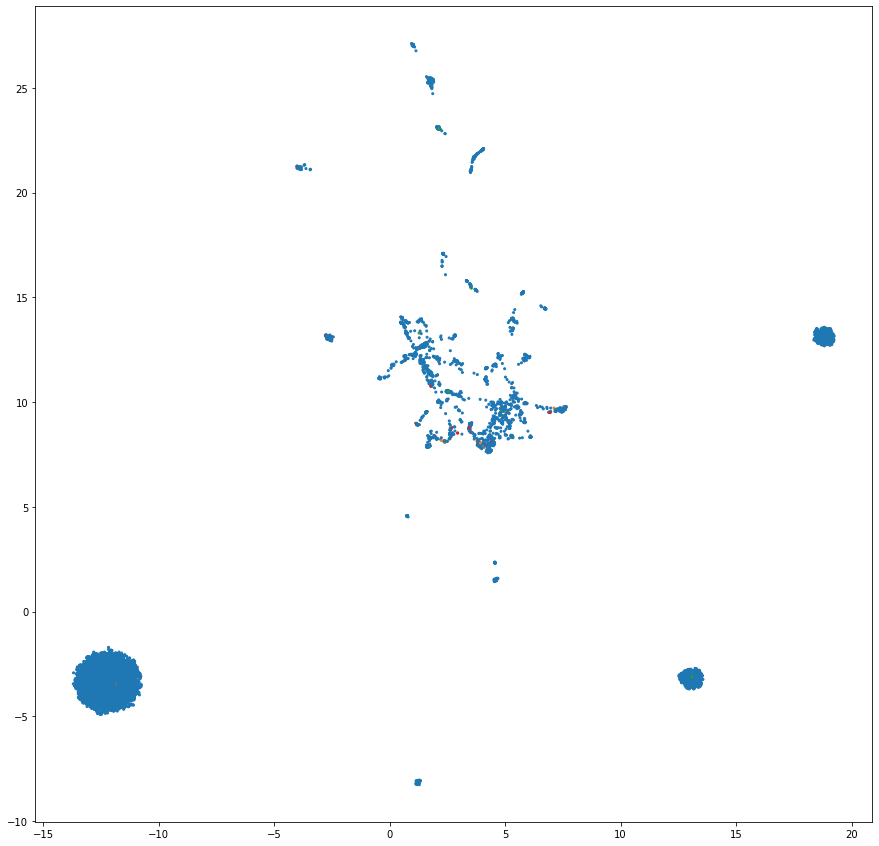

In [5]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 15]
total_df["val_result"] = total_df["val_result"].astype('category')
plt.scatter(embedding[:, 0], embedding[:, 1],
    c=[sns.color_palette()[x] for x in total_df["val_result"].cat.codes], s=4)

In [177]:
val_df = total_df[total_df.val_result != "-1"]
total_df["val_result"] = val_df["val_result"].replace("True ME", 1)
total_df["val_result"] = val_df["val_result"].replace("False-positive", 2)
total_df["val_result"] = val_df["val_result"].replace("Tissue-specific", 3)
total_df["val_result"].value_counts()

True ME           47
False-positive    26
3                 24
Name: val_result, dtype: int64

In [ ]:
total_reducer = umap.UMAP(n_neighbors=10, verbose=True)
total_reducer = total_reducer.fit(total_df.iloc[:, 8:], y=total_df["val_result"])
val_embeddings = total_reducer.transform(val_df.iloc[:, 8:])
total_embeddings = total_reducer.transform(total_df.iloc[:, 8:])

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=10, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Feb  7 17:06:18 2020 Finding Nearest Neighbors
Fri Feb  7 17:06:18 2020 Building RP forest with 9 trees
Fri Feb  7 17:06:23 2020 NN descent for 13 iterations


/Users/omar/Documents/GitHub/VMIAP/venv/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "venv/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


/Users/omar/Documents/GitHub/VMIAP/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/omar/Documents/GitHub/VMIAP/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/omar/Documents/GitHub/VMIAP/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

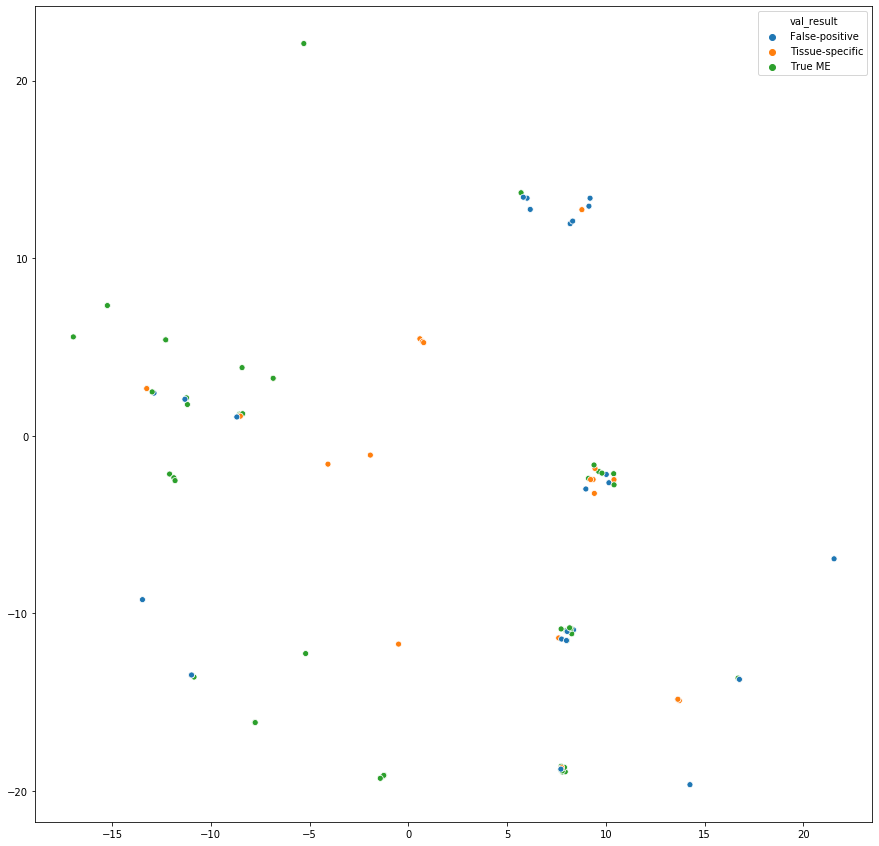

In [164]:
sns.scatterplot(val_embeddings[:, 0], val_embeddings[:, 1], hue=val_df["val_result"])

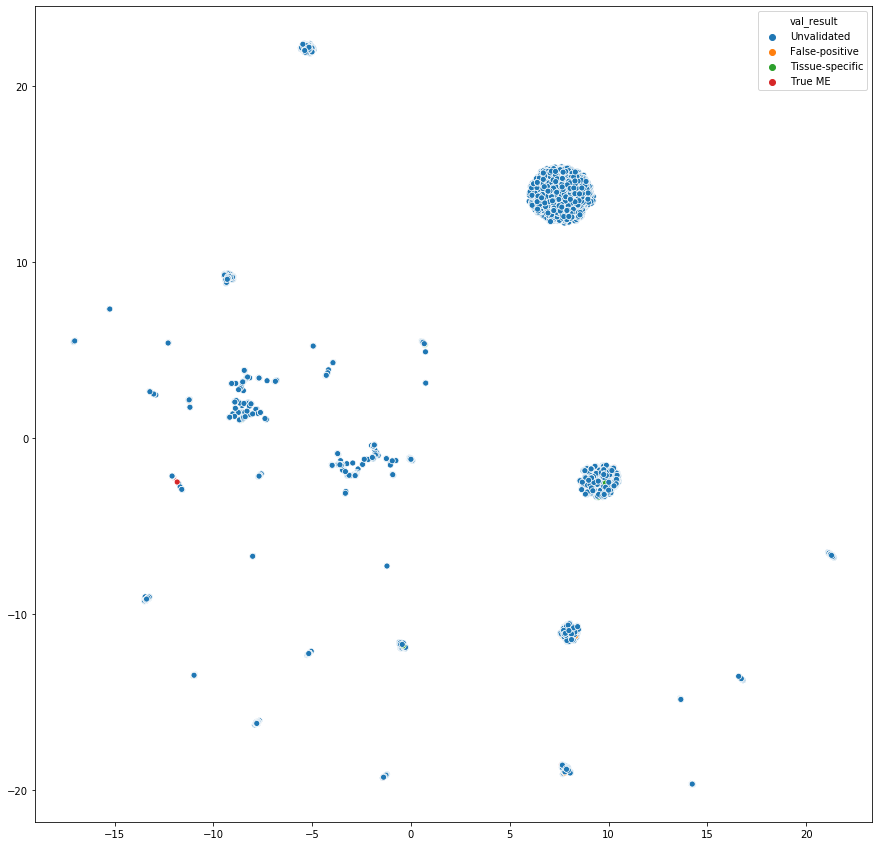

In [165]:
total_df["val_result"] = total_df["val_result"].replace("-1", "Unvalidated")
total_df["val_result"] = total_df["val_result"].replace("1", "True ME")
total_df["val_result"] = total_df["val_result"].replace("2", "False-positive")
total_df["val_result"] = total_df["val_result"].replace("3", "Tissue-specific")
sns.scatterplot(total_embeddings[:, 0], total_embeddings[:, 1], hue=total_df["val_result"])